In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans 

In [2]:
data=pd.read_csv(r'C:\Users\cheth\Assignment\Clustering\crime_data.csv')

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data1=data.rename(columns={"Unnamed: 0":"City"})

In [5]:
data1.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
scaled_univ_df=scaler.fit_transform(data1.iloc[:,1:])
scaled_univ_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

C:\Users\cheth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


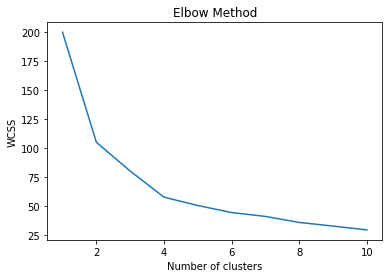

In [8]:
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,random_state=42)
    Kmeans.fit(scaled_univ_df)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [9]:
print(wcss)

[200.0, 104.96163315756873, 80.08569526137276, 57.55425863091106, 50.33327385184908, 44.25980763811232, 40.91266722247345, 35.69587706333374, 32.57509993011514, 29.253498916734603]


In [10]:
clusters_new=KMeans(4,random_state=42)

In [11]:
clusters_new.fit(scaled_univ_df)

KMeans(n_clusters=4, random_state=42)

In [12]:
data1['Clusterid_new']=clusters_new.labels_

In [13]:
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [14]:
data1.groupby('Clusterid_new').agg(['mean']).reset_index()

,Clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [15]:
data1.groupby('Clusterid_new').agg(['count']).reset_index()

,Clusterid_new,City,Murder,Assault,UrbanPop,Rape
,,count,count,count,count,count
0,0,16,16,16,16,16
1,1,8,8,8,8,8
2,2,13,13,13,13,13
3,3,13,13,13,13,13


In [16]:
#with the K value 4 we get better Clusetring data.
#Values are spreaded equally

,City,Murder,Assault,UrbanPop,Rape,Clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1
